## Q1

### 1-a Jacobi Method

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

lambda_symbol = '\u03bb'
R12, R23, R34, R45, R56, R25 = np.array([8, 12, 5, 15, 30, 25])
A = np.array([  [1, -1, 0, 0, 0, -1],
                [0, 1, -1, 0, 0, 0],
                [0, 0, 1, -1, 0, 0],
                [0, 0, 0, 1, -1, 1],
                [R12, 0, 0, 0, R56, R25],
                [0, R23, R34, R45, 0, -R25] ] 
            ,dtype=float)
b = np.array([[0, 0, 0, 0, 100, 0]],dtype=float).T
D = np.diag(np.diag(A))
Real_X = np.linalg.solve(A, b)
print(f"Real x: \n{Real_X}")
NOT_D = A - D
D_Inverse = np.linalg.inv(D)
Lambda = np.array([0.3, 0.7, 1.2, 1.0])


Real x: 
[[1.92178018]
 [0.84288604]
 [0.84288604]
 [0.84288604]
 [1.92178018]
 [1.07889413]]


In [71]:
def plot_Jacobi_Or_Gauss(track,Lambda, Method):
    plt.rcParams.update({'font.size': 14})
    plt.title(f'{Method} ({lambda_symbol} = {Lambda})')  # 圖的標題
    plt.grid(True)  # 顯示網格
    for i in range(6):
        Y_data = [item[i] for item in track['(x1, x2, x3, x4, x5, x6)']]
        plt.plot([x for x in range(len(track))], Y_data, label=f'x{i}')
        plt.legend()
    # print(f"Guess x:\n{track['(x1, x2, x3, x4, x5, x6)'][len(track)-1]}")
    # print(f"Real x: \n{Real_X.T}")

Real x: 
[[1.92178018]
 [0.84288604]
 [0.84288604]
 [0.84288604]
 [1.92178018]
 [1.07889413]]


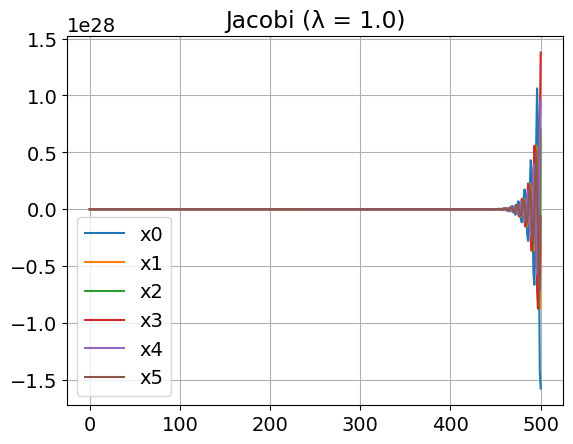

In [72]:

def Jacobi_Method(Lambda):
    Guess_X = np.zeros(6,dtype=float).reshape(6,1)
    E_t = Real_X - Guess_X
    Valid_Et = np.linalg.norm((Real_X - Guess_X)/Real_X)
    iter = 0
    track = []
    max_iter = 500
    while Valid_Et > 1e-3:
        Pre_Guess_X = Guess_X
        Guess_X = D_Inverse @ (b - NOT_D @ Guess_X)
        Guess_X = Lambda * Guess_X + (1 - Lambda) * Pre_Guess_X
        new_row = {"iter": iter, "(x1, x2, x3, x4, x5, x6)": (Guess_X[0][0], Guess_X[1][0], Guess_X[2][0], Guess_X[3][0], Guess_X[4][0], Guess_X[5][0])}
        track.append(new_row)
        E_t = Real_X - Guess_X
        Valid_Et = np.linalg.norm((Real_X - Guess_X)/Real_X)
        iter = iter + 1
        if(iter > max_iter):
            break
    track = pd.DataFrame(track,columns=['iter','(x1, x2, x3, x4, x5, x6)'])
    return track

track = Jacobi_Method(Lambda[3])
plot_Jacobi_Or_Gauss(track, Lambda[3], 'Jacobi')
print(f"Real x: \n{Real_X}")

從圖中很明顯能觀察到，Jacobi並無收斂

### 1-b Gauss-Seidel

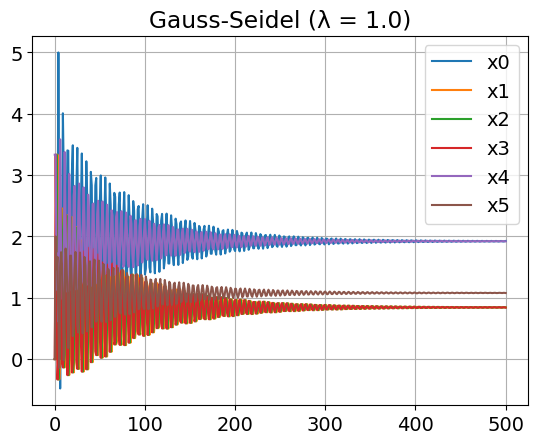

In [73]:
def Gauss_Seidel(Lambda):
    U = np.triu(A)
    L = np.tril(A)
    np.fill_diagonal(L, 0)
    np.fill_diagonal(U, 0)
    DL_inverse = np.linalg.inv(D+L)
    Guess_X = np.zeros(6,dtype=float).reshape(6,1)
    E_t = Real_X - Guess_X
    Valid_Et = np.linalg.norm((Real_X - Guess_X)/Real_X)
    print()

    iter = 0
    track = []
    max_iter = 500
    while Valid_Et > 1e-3:
        Pre_Guess_X = Guess_X
        Guess_X = DL_inverse @ (b - U @ Guess_X)
        Guess_X = Lambda * Guess_X + (1 - Lambda) * Pre_Guess_X
        new_row = {"iter": iter, "(x1, x2, x3, x4, x5, x6)": (Guess_X[0][0], Guess_X[1][0], Guess_X[2][0], Guess_X[3][0], Guess_X[4][0], Guess_X[5][0])}
        track.append(new_row)
        E_t = Real_X - Guess_X
        Valid_Et = np.linalg.norm((Real_X - Guess_X)/Real_X)
        iter = iter + 1
        if(iter > max_iter):
            break
    track = pd.DataFrame(track,columns=['iter','(x1, x2, x3, x4, x5, x6)'])
    return track

track = Gauss_Seidel(Lambda[3])
plot_Jacobi_Or_Gauss(track, Lambda[3], 'Gauss-Seidel')

換成 Gauss-Seidel 之後，解會收斂，且大約迴圈跑了 300 次之後解會明顯收斂在某個值

### 1-c Relaxation

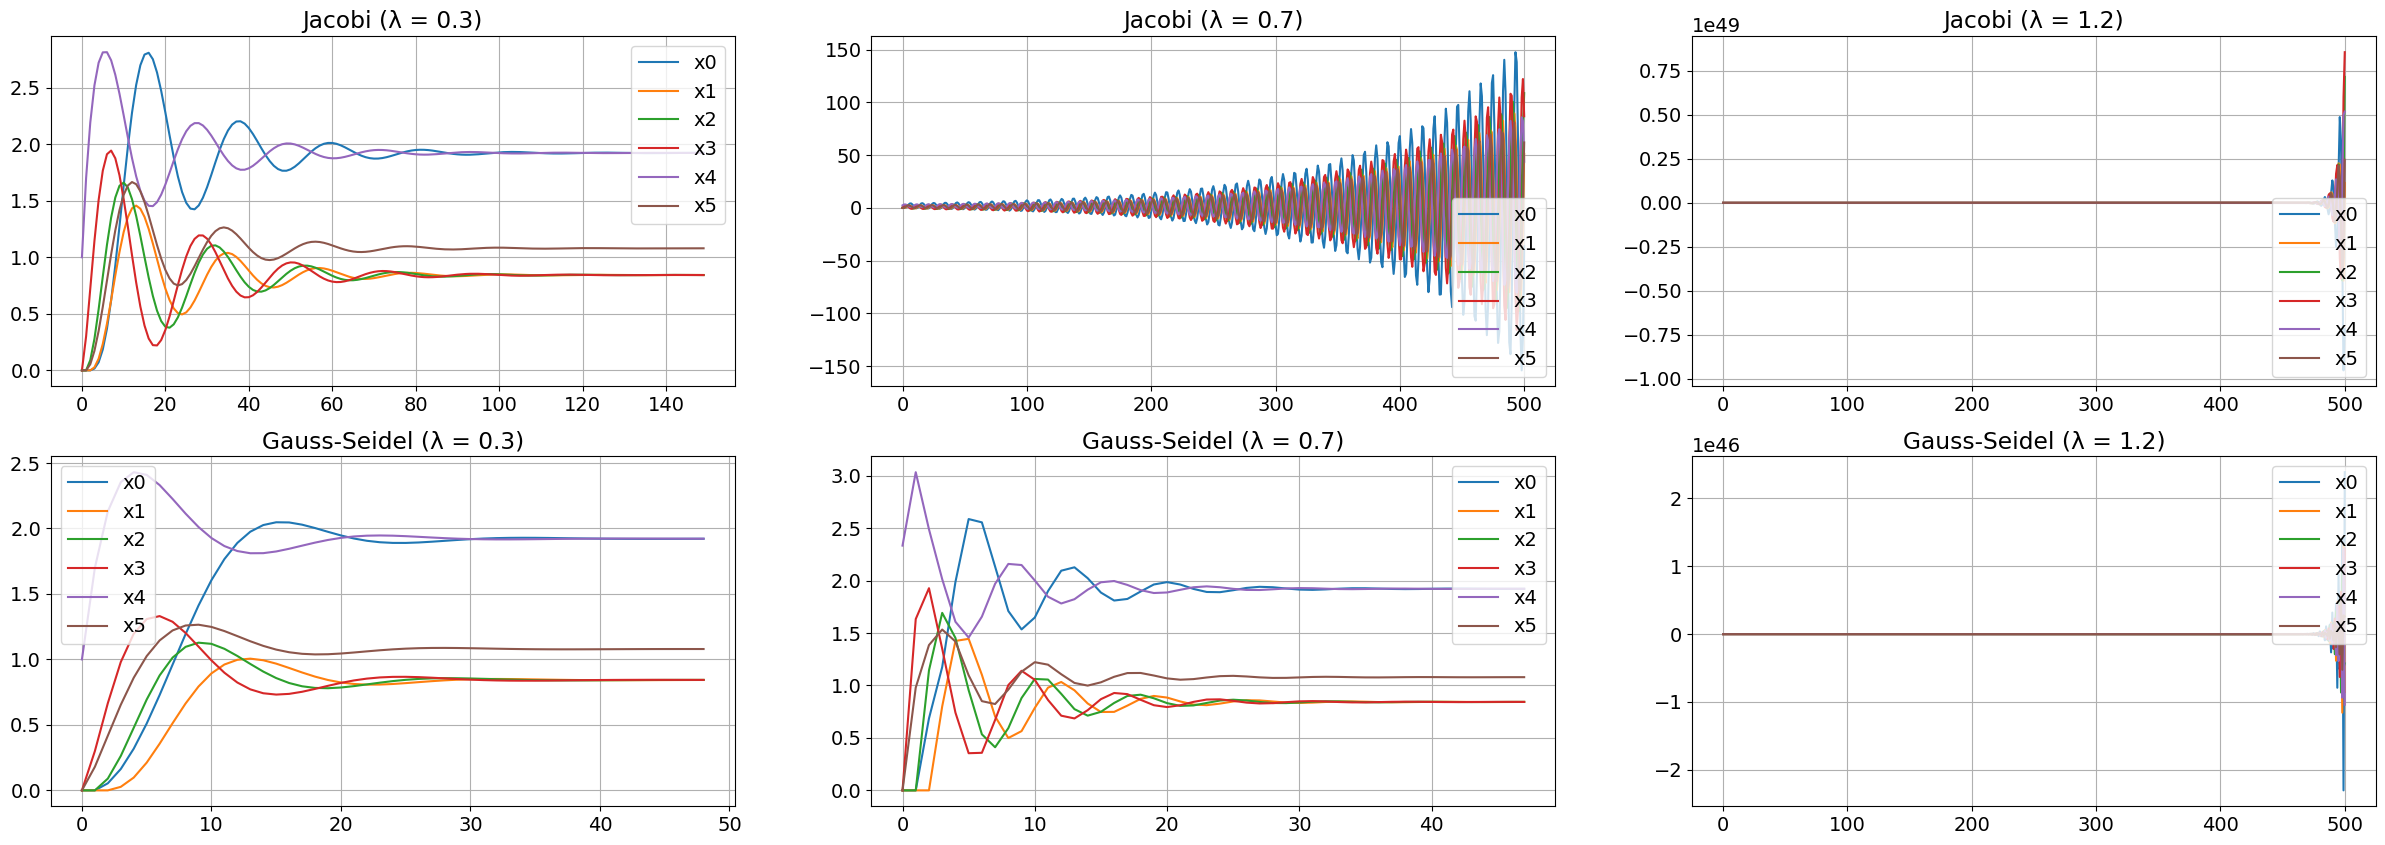

In [74]:
method = [Jacobi_Method, Gauss_Seidel]
plt.figure(figsize=(30,10))
for idx, m in enumerate(method):
    for j, l in enumerate(Lambda[:-1]): 
        track = m(l)
        plt.subplot(2,3,j+1+3*idx)  
        if idx == 0:
            plot_Jacobi_Or_Gauss(track,l,'Jacobi')
        else:
            plot_Jacobi_Or_Gauss(track,l,'Gauss-Seidel')

plt.show()

上排為 Jacobi，下排為 Gauss-Seidel，由左至右的 $\lambda$ 分別為 0.3 0.7 1.2，從結果可觀察到 Jacobi 只有 $\lambda$ 值 0.3 才收斂，Gauss-Seidel 的狀況就相對穩定很多，當 overrelaxation 則是兩個方法都會 diverge

### Q2

Average of PI (Run = 50): 3.1422624000000003
Standard deviation (Run = 50): 0.00946172469690384


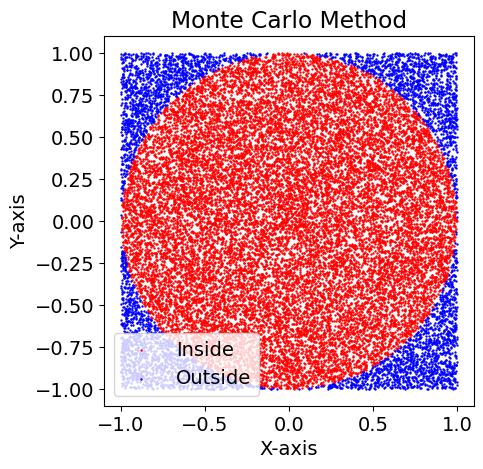

In [75]:
RUN = 50
N = 25000
R = 1.0

Value = np.zeros(RUN)

for i in range(RUN):
    np.random.seed(i+100)
    x = np.random.uniform(-R, R, N)
    y = np.random.uniform(-R, R, N)
    v = np.array([x, y])
    norms = np.linalg.norm(v, ord=2, axis=0)
    mask_inside = norms < 1 
    mask_outside = norms >= 1
    Value[i] = float(len(norms[mask_inside]))/N*4

categories = norms >= 1

print(f"Average of PI (Run = {RUN}): {Value.mean()}")
print(f"Standard deviation (Run = {RUN}): {Value.std()}")

plt.gca().set_aspect('equal')
plt.scatter(x[categories == 0], y[categories == 0], color='red', label='Inside', s= 0.5)
plt.scatter(x[categories == 1], y[categories == 1], color='blue', label='Outside', s= 0.5)
plt.title('Monte Carlo Method')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

上圖的 Monte Carlo Method 所估計出的 $\pi$ 值為 50 次實驗的平均值，每次實驗會灑 25000 個隨機點，並計算在圓內的次數以估計 $\pi$ 值 

### Q3

### 3-a

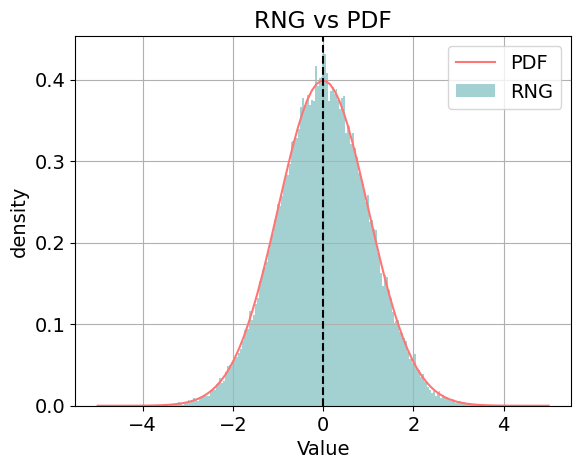

In [76]:
mu, sigma = 0, 1
N = 50000
Random_Number_Normal = np.random.normal(mu, sigma, N)
x = np.linspace(-5, 5, 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.rcParams.update({'font.size': 14})
plt.plot(x,y,color='#FF7575',label = 'PDF')
plt.axvline(x=0, color='black', linestyle='--')
plt.hist(Random_Number_Normal, bins=200, density=True, color='#A3D1D1', label='RNG')
plt.legend()
plt.title('RNG vs PDF')
plt.xlabel('Value')
plt.ylabel('density')
plt.grid(True)
plt.show()

上圖為統計 5 萬個由 $N(0,1)$ 生成的隨機點之直方圖

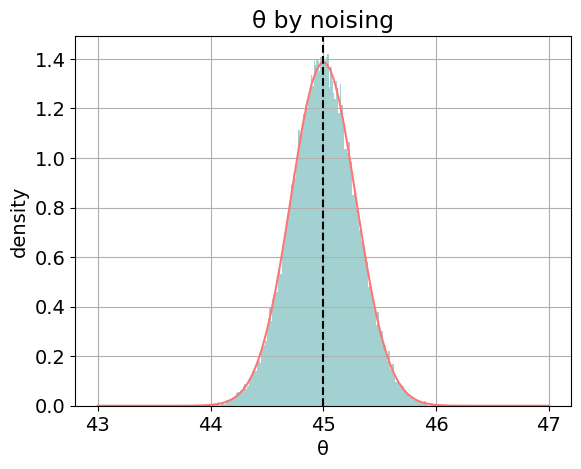

new mean: 0.2876865831163818
new std: 0.2876865831163818


In [77]:
def Vector_By_Noising(r):
    N = 50000
    mu, sigma = 0, 1
    phase = np.pi / 4
    real = r*np.cos(phase) + np.random.normal(mu, sigma, N)
    imaginary = r*np.sin(phase) + np.random.normal(mu, sigma, N)
    theta = np.arctan(imaginary / real) / np.pi * 180
    return theta
    
theta = Vector_By_Noising(200)
plt.rcParams.update({'font.size': 14})
plt.xlabel('θ')
plt.ylabel('density')
plt.title('θ by noising')
mu, sigma = theta.mean(), theta.std()
plt.grid(True)
x = np.linspace(43, 47, 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x,y,color='#FF7575')
plt.axvline(x=45, color='black', linestyle='--')
plt.hist(theta, bins=200, density=True, color='#A3D1D1')
plt.show()
print(f'new mean: {sigma}')
print(f'new std: {sigma}')


對實部和虛部加入高斯雜訊之後，所得到的 $\theta$ 仍維持高斯分布，中心點為 $\theta = 45$，且 $\sigma$ 從 1 變成大約 0.28。

### 3-c

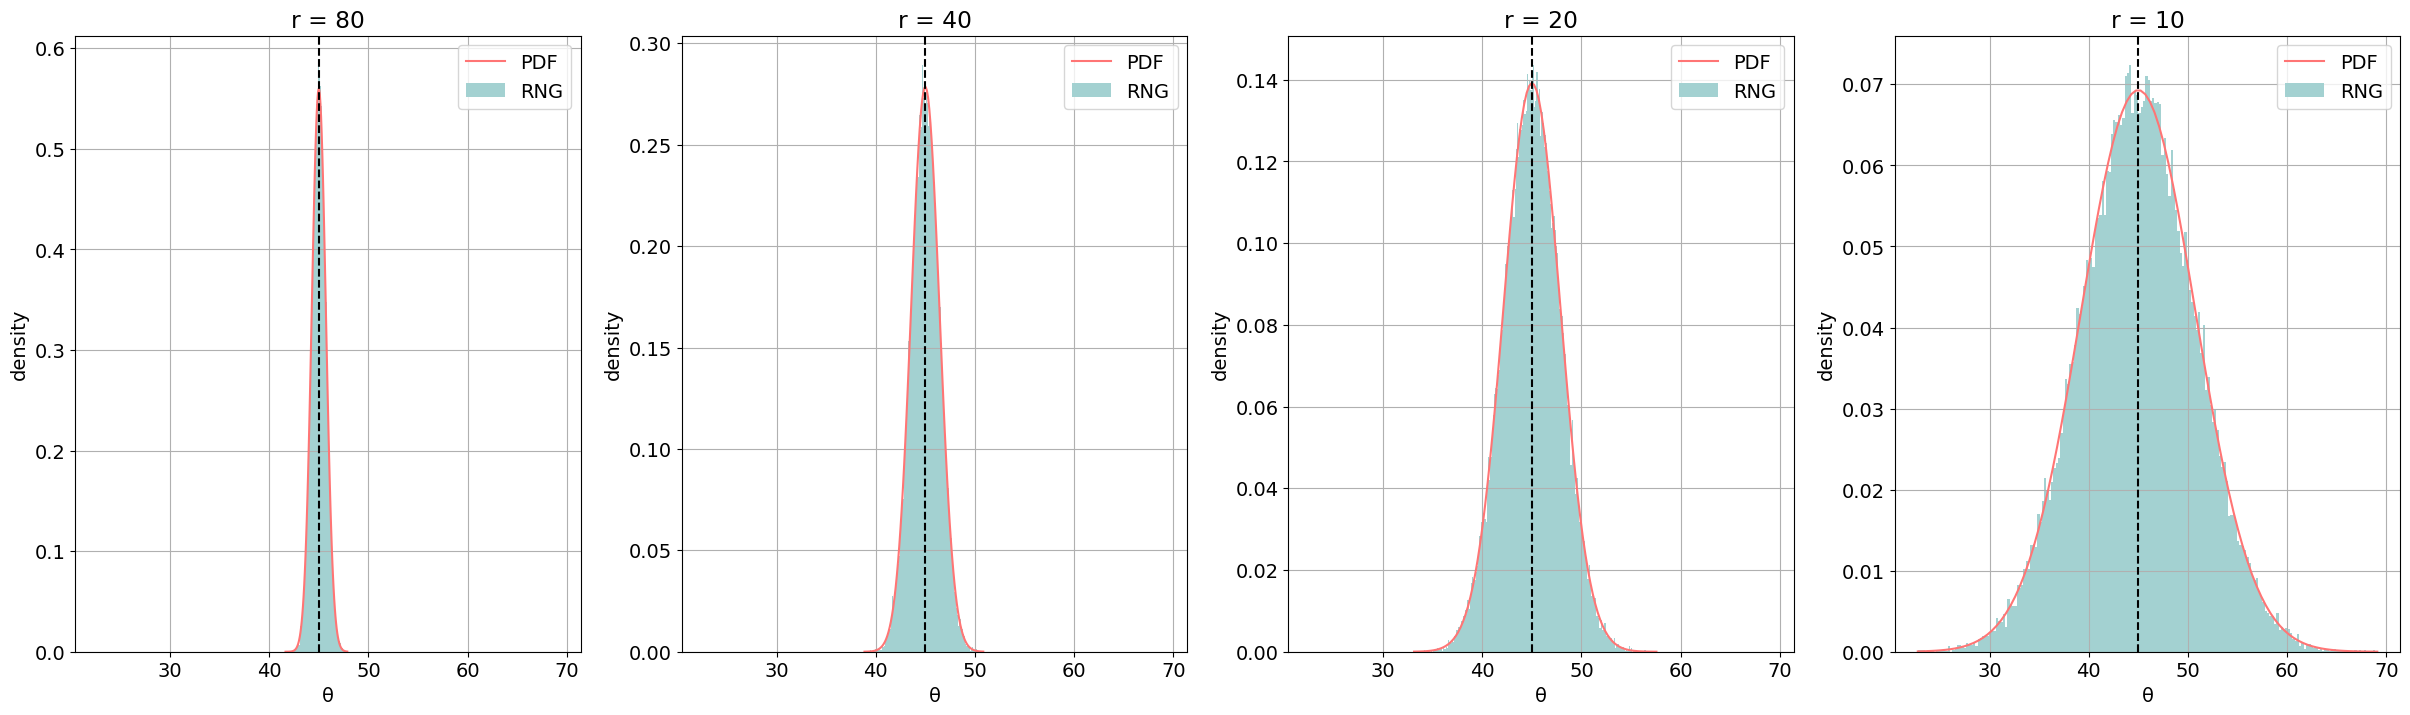

In [78]:
r = [80,40,20,10]
theta = [Vector_By_Noising(r[0]), Vector_By_Noising(r[1]), Vector_By_Noising(r[2]), Vector_By_Noising(r[3])]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(30, 8))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.xlabel('θ')
    plt.ylabel('density')
    plt.title(f'r = {r[i-1]}')
    mu, sigma = theta[i-1].mean(), theta[i-1].std()
    plt.grid(True)
    x_min = np.min(theta[i-1])
    x_max = np.max(theta[i-1])
    x = np.linspace(x_min, x_max, 100)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    plt.plot(x,y,color='#FF7575',label='PDF')
    plt.axvline(x=mu, color='black', linestyle='--')
    plt.hist(theta[i-1], bins=200, density=True, color='#A3D1D1',label='RNG')
    plt.legend()
for ax in plt.gcf().axes:
    ax.sharex(plt.gcf().axes[0])
plt.show()

從圖能明顯觀察到若 r 越大，則標準差越小

### 3-d

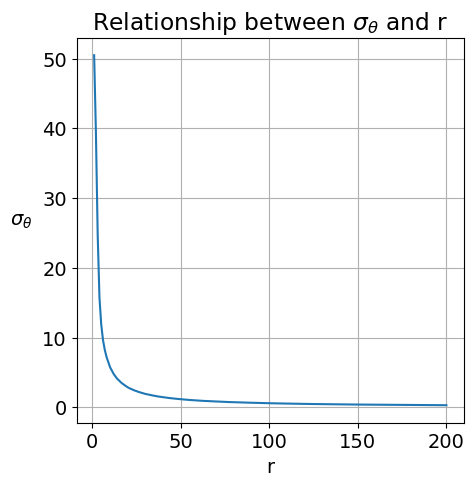

In [79]:
theta = [Vector_By_Noising(x) for x in range(1,201)]
theta_std = [t.std() for t in theta] 
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(5,5))
plt.title(r'Relationship between $\sigma_\theta$ and r')
plt.xlabel('r')
plt.ylabel(r'$\sigma_\theta$', rotation=0, labelpad=15)
plt.plot(np.arange(1,201), theta_std)
plt.grid(True)
plt.show()

承 3-c，試了不同的 r，r 與 $\sigma_\theta$ 的關係為反比

In [80]:
def Regression_Omega(t_vector,mode='regular'):
    angle = 45
    Weight = np.array([1/10, 1/50, 1/90])
    W = np.diag(Weight)
    y = []
    N = 50000

    for t in t_vector:
        r = S0*np.exp(-t/T2)
        mu , sigma = 0, 1
        phase = 2*np.pi*(angle/360)
        real = r*np.cos(w*t + phase) + np.random.normal(mu, sigma, N)
        imaginary = r*np.sin(w*t + phase) + np.random.normal(mu, sigma, N)
        theta = np.arctan2(imaginary, real)
        y.append(theta)

    x = np.array([[1, 10],[1, 50],[1, 90]])
    y_reg = []
    for i in range(N):
        y_vector = np.array([[y[0][i], y[1][i], y[2][i]]]).T
        if mode == 'regular':
            a = np.linalg.inv(x.T @ x) @ x.T @ y_vector
        if mode == 'weight':
            x_prime = W @ x
            y_prime = W @ y_vector
            a = np.linalg.inv(x_prime.T @ x_prime) @ x_prime.T @ y_prime
        predict = x @ a
        predict = predict - phase
        for idx, t in enumerate(t_vector):
            predict[idx] = predict[idx] / t
        y_reg.append(predict)

    y_reg = np.array(y_reg)
    return y_reg

def plot_omega(Omega_Reg):
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(50, 8))
    for i in range(1, 4):
        plt.subplot(1, 4, i)
        plt.xlabel(r'$\omega$')
        plt.ylabel('density')
        mu, sigma = Omega_Reg[:,i-1].mean(), Omega_Reg[:,i-1].std()
        plt.title(r'$\omega$ at $t = {} \rightarrow \mu_\omega$: {:.6f}, $\sigma_\omega$: {:.6f}'.format(t_vector[i-1], mu, sigma))
        plt.grid(True)
        x_min = np.min(Omega_Reg[:,i-1])
        x_max = np.max(Omega_Reg[:,i-1])
        x = np.linspace(x_min, x_max, 100)
        y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
        plt.plot(x,y,color='#FF7575',label='PDF')
        plt.axvline(x=mu, color='black', linestyle='--')
        plt.hist(Omega_Reg[:,i-1], bins=200, density=True, color='#A3D1D1',label='RNG')
        plt.legend()
    for ax in plt.gcf().axes:
        ax.sharex(plt.gcf().axes[0])
    plt.show()

t_vector = np.array([10, 50, 90])
S0, T2, w = 100, 32, np.pi/200

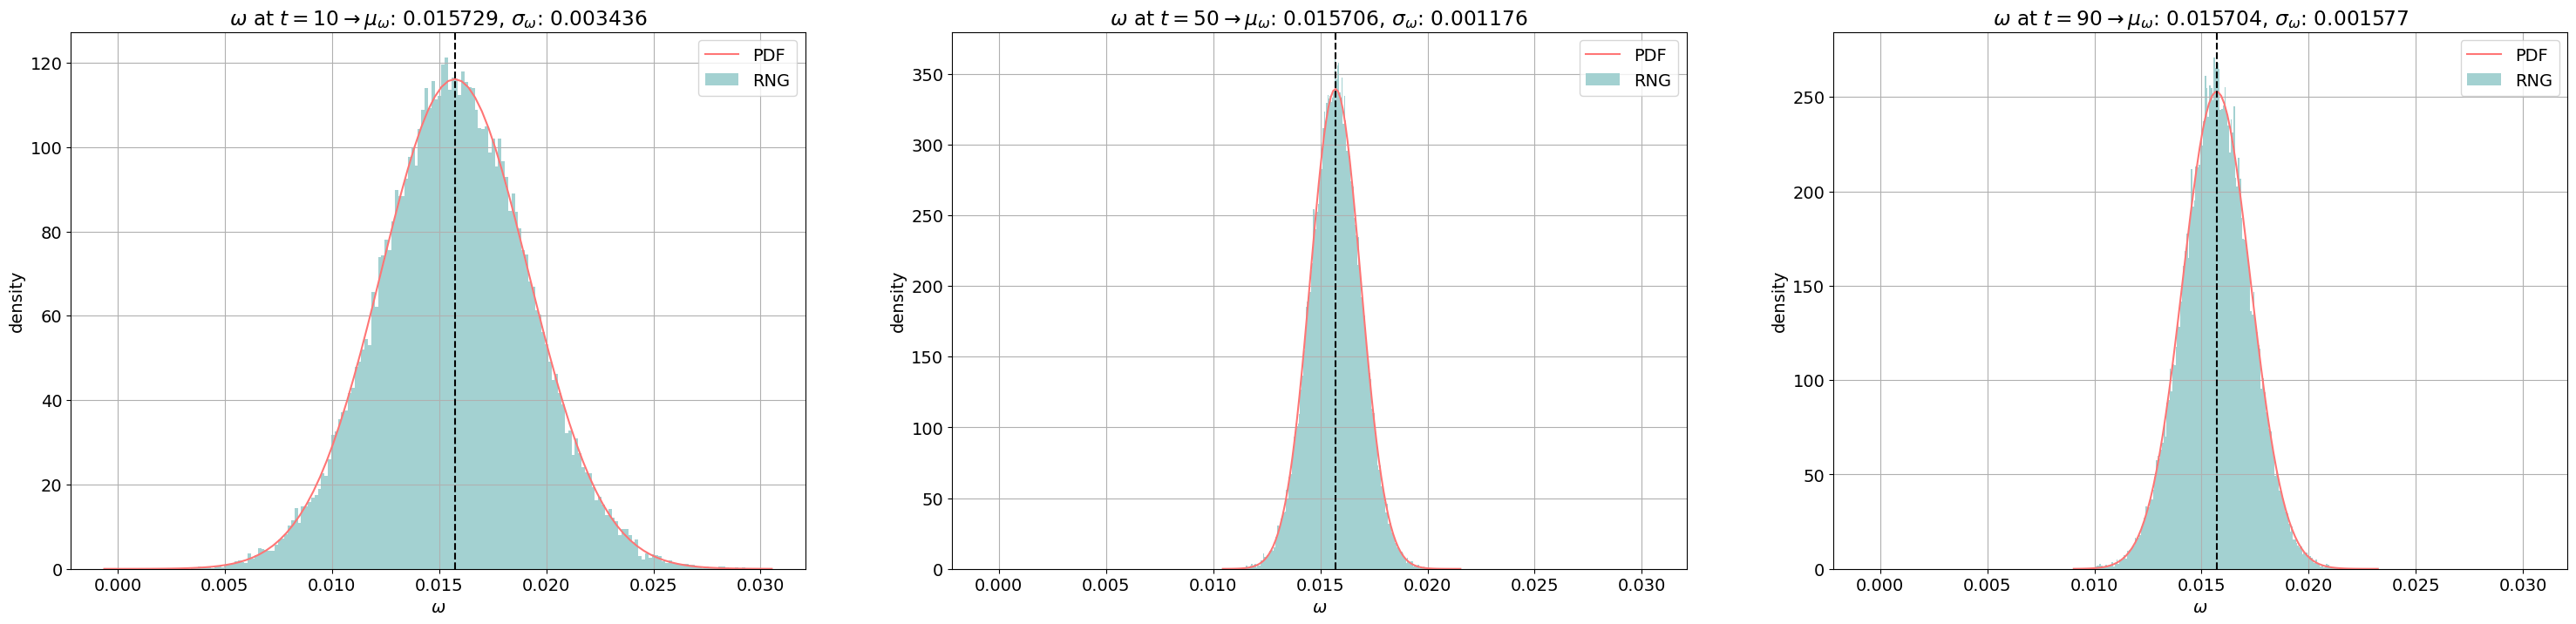

In [81]:
Omega_Reg = Regression_Omega(t_vector)
plot_omega(Omega_Reg)

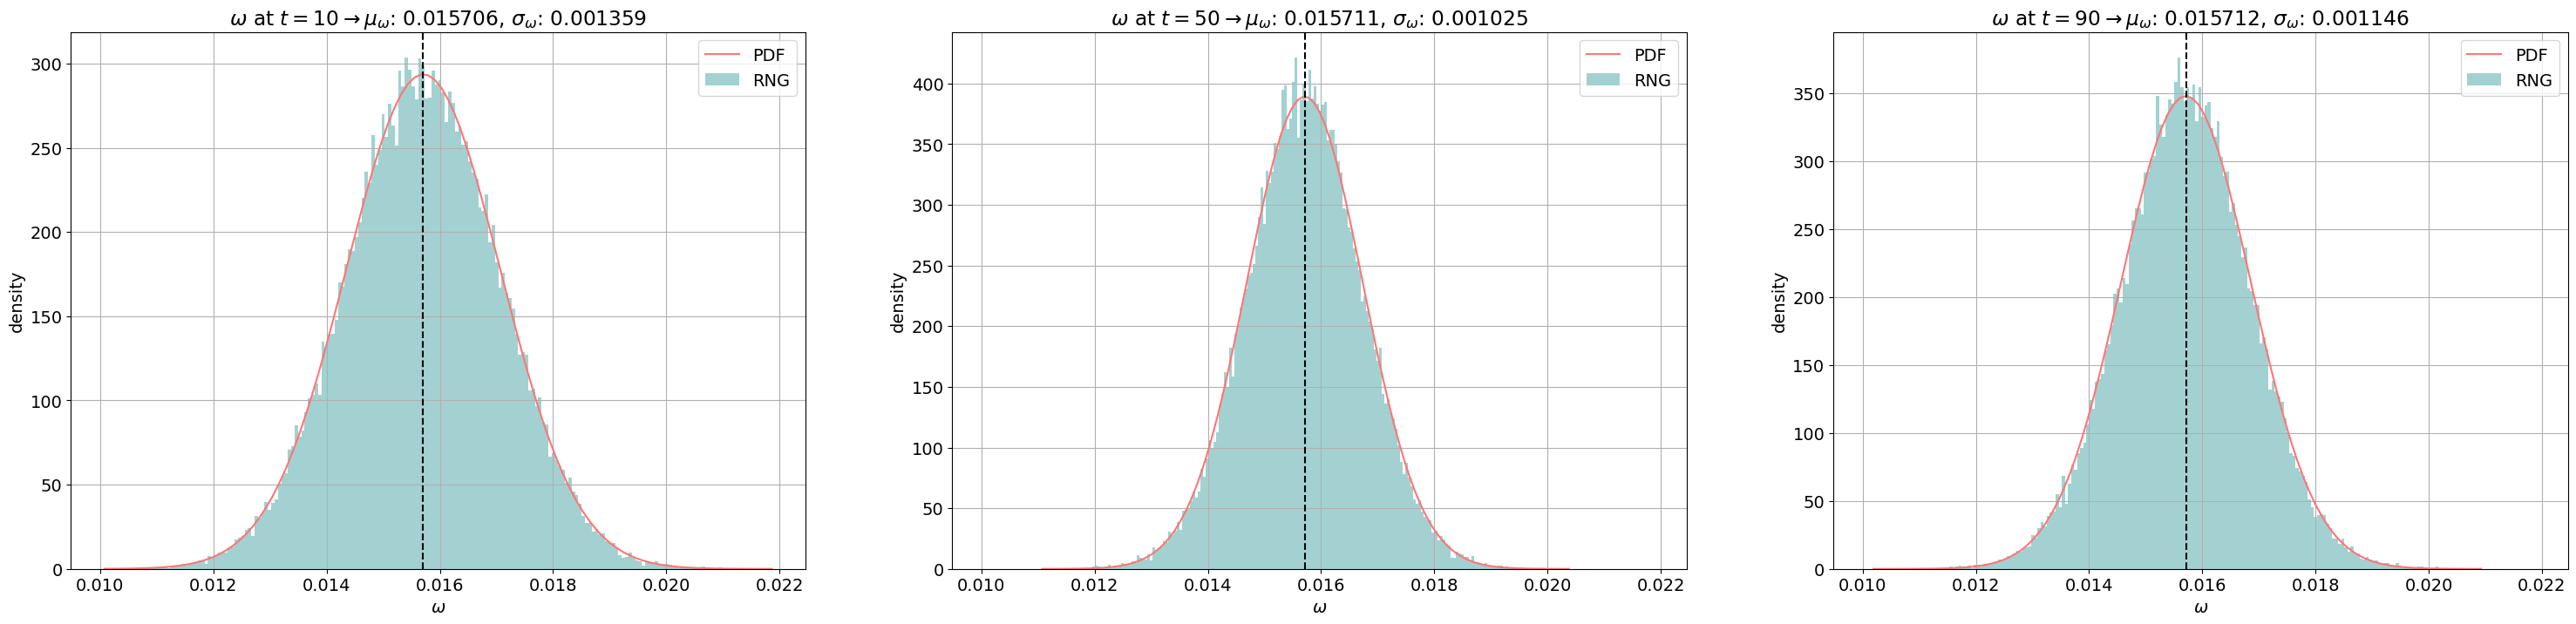

In [82]:
Omega_Reg = Regression_Omega(t_vector, mode='weight')
plot_omega(Omega_Reg)

權重矩陣 
$
W = \begin{bmatrix}
\frac{1}{t[0]} & 0 & 0 \\
 0 & \frac{1}{t[1]} & 0 \\
 0 & 0 & \frac{1}{t[2]}
\end{bmatrix}
$
且
$t = \begin{bmatrix}
10 & 50 & 90
\end{bmatrix}
$
，會這樣設計是因為從 3-d 這個小題發現 $\sigma_\theta$ 和 $r$ 的關係成反比，跟 3-e 的圖比較後，會發現 3-f 的圖，三種分布的 $\sigma_\omega$ 非常相近。